In [63]:
import yfinance as yf
import fred
from yahoo_fin.stock_info import get_data

import requests
import json
import prettytable
import pandas as pd
import datetime
import numpy as np

First we are getting information from two sources: 
1. Car CPI from FRED (Federal Reserve bank of St Louise)
2. Stock prices from Yahoo Finance

You would need to register for API key to obtain data from FRED.
For yahoo you do not

In [59]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SETA02','CUUR0000SS4501A'],"startyear":"2002", "endyear":"2022", 
                   "registrationkey":"enter_your_key_here"})

# mappying of series id can be found in https://download.bls.gov/pub/time.series/cu/cu.item

s_name = ['Used cars and trucks', 'New cars and trucks' ]


p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)



In [79]:
#initial processing of json object and stores the data in pandas dataframe

result = list()
for series in json_data['Results']['series']:
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        date = datetime.date(year=int(year), month=int(period[-2:]), day=1)

        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            result.append((seriesId,year,period,value,date))

a = pd.DataFrame(result, columns=["series id","year","period","value","date"])


In [138]:
b = pd.DataFrame()

#calculate the percentage difference 12 months ago (YoY)

b["date"] = a[a['series id']== 'CUUR0000SETA02']["date"]
series = ['CUUR0000SETA02','CUUR0000SS4501A']
for s in series:
        b[s] = np.array(a[a['series id']== s]["value"].astype(float).pct_change(periods=-12))

name_dict = {}
for i in range(len(series)):
    name_dict[series[i]] = s_name[i]

In [142]:
#Use yahoo_fin library to get the weekly stock price of 4 major auto companies

ford = get_data("ford", start_date="12/04/2008",  index_as_date = True, interval="1wk")
gm = get_data("gm", start_date="12/04/2008",  index_as_date = True, interval="1wk")
tm = get_data("tm", start_date="12/04/2008",  index_as_date = True, interval="1wk")
tsla = get_data("tsla", start_date="12/04/2008",  index_as_date = True, interval="1wk")


Now we would like to see the relationship between the share price of Ford , and the CPI of US new car and truck sales

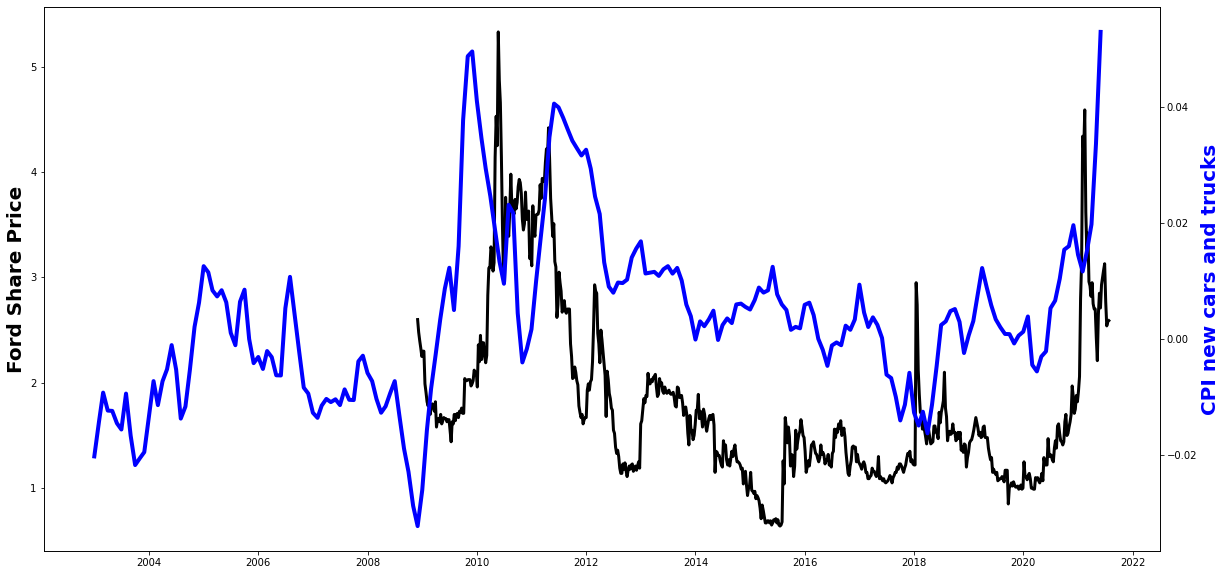

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["k", "y", "b", "orange", "lightseagreen", "darkviolet", "r"]
fig, ax = plt.subplots(figsize=(20, 10))
#ax.plot(gold["close"], color=cols[5])
ax = sns.lineplot(x= ford.index, y = ford["close"], color=cols[0], linewidth = 3)
ax.set_ylabel("Ford Share Price",color=cols[0],fontsize=20, weight = 'bold')  

ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.set_ylabel("CPI new cars and trucks",color=cols[2],fontsize=20, weight = 'bold')  
ax2.plot(b["date"], b["CUUR0000SS4501A"], color=cols[2], linewidth = 4)

#ax2 = sns.lineplot(x= ncw.index, y = ncw["close"], color=cols[4])

You can see a strong cyclical pattern for both FORD and Toyota, as they are in a matured (and shrinking) auto market

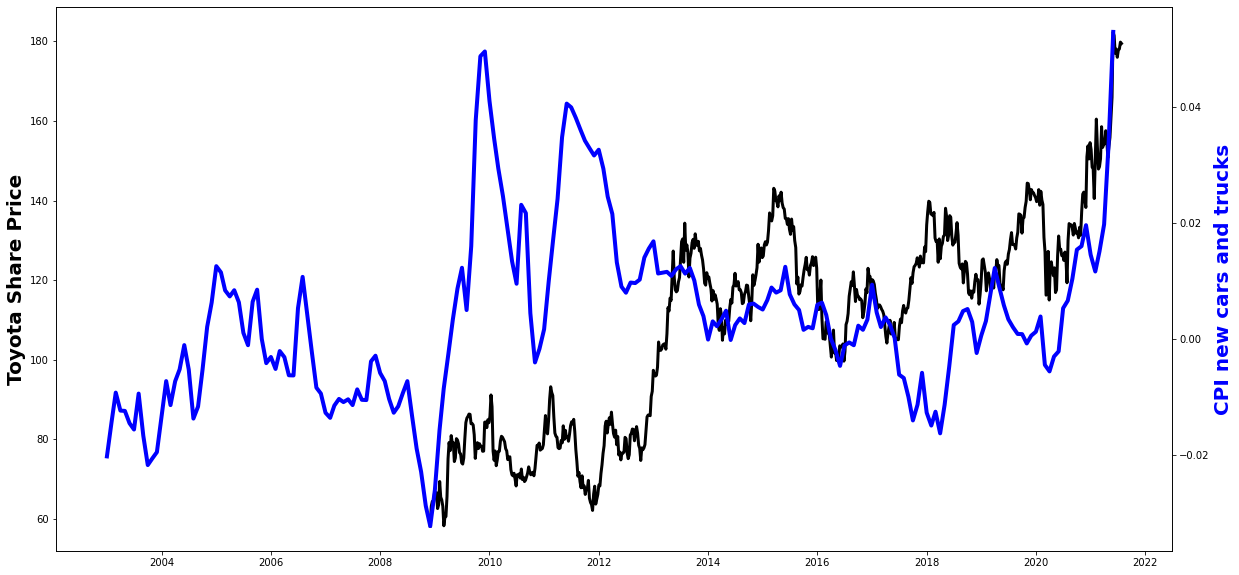

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["k", "y", "b", "orange", "lightseagreen", "darkviolet", "r"]
fig, ax = plt.subplots(figsize=(20, 10))
#ax.plot(gold["close"], color=cols[5])
ax = sns.lineplot(x= tm.index, y = tm["close"], color=cols[0], linewidth = 3)
ax.set_ylabel("Toyota Share Price",color=cols[0],fontsize=20, weight = 'bold')  

ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.set_ylabel("CPI new cars and trucks",color=cols[2],fontsize=20, weight = 'bold')  
ax2.plot(b["date"], b["CUUR0000SS4501A"], color=cols[2], linewidth = 4)

#ax2 = sns.lineplot(x= ncw.index, y = ncw["close"], color=cols[4])

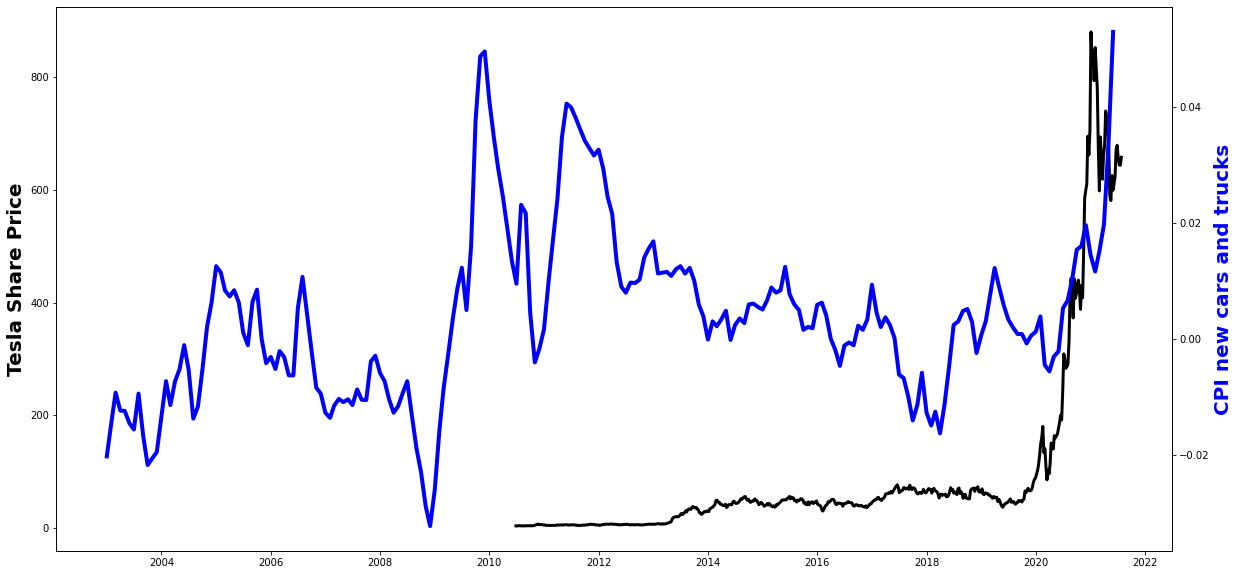

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["k", "y", "b", "orange", "lightseagreen", "darkviolet", "r"]
fig, ax = plt.subplots(figsize=(20, 10))
#ax.plot(gold["close"], color=cols[5])
ax = sns.lineplot(x= tsla.index, y = tsla["close"], color=cols[0], linewidth = 3)
ax.set_ylabel("Tesla Share Price",color=cols[0],fontsize=20, weight = 'bold')  

ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.set_ylabel("CPI new cars and trucks",color=cols[2],fontsize=20, weight = 'bold')  
ax2.plot(b["date"], b["CUUR0000SS4501A"], color=cols[2], linewidth = 4)

#ax2 = sns.lineplot(x= ncw.index, y = ncw["close"], color=cols[4])